# Sentiment analysis and entity classification

- Conducted sentiment analysis and entity classification on Twitter data.
- Implemented data preprocessing, including text cleaning and tokenization.
- Utilized Word2Vec word embedding for text data.
- Employed various machine learning models, including Naive Bayes, Logistic Regression, and Support Vector Machine (SVM).
- Optimized model hyperparameters through grid search.
- Visualized classification metrics, including accuracy, precision, recall, and F1-score.
- Demonstrated the power of natural language processing (NLP) in text analysis.

## Libraries Imports

####  - Libraries for Data Manipulation

- `numpy`: A library for numerical operations in Python.
- `pandas`: A powerful data manipulation and analysis library.
- `re`: The regular expressions library for string pattern matching.

####  - Libraries for Natural Language Processing (NLP)

- `nltk`: The Natural Language Toolkit for NLP tasks.
- `stopwords`: From `nltk.corpus`, for removing common stopwords.
- `word_tokenize`: From `nltk.tokenize`, used for tokenizing text.
- `WordNetLemmatizer`: From `nltk.stem`, for lemmatizing words.
- `Word2Vec`: From `gensim.models`, for word embeddings.

####  - Libraries for Data Visualization

- `WordCloud`: For creating word clouds.
- `matplotlib.pyplot`: For basic plotting in Python.
- `make_subplots`, `plotly.express`, `plotly.graph_objects`, `plotly.figure_factory`: Various Plotly libraries for interactive visualizations.
- `tabulate`: For formatting data into tables.

####  - Libraries for Machine Learning Modeling

- `Pipeline`: From `sklearn.pipeline`, for building data preprocessing pipelines.
- `TfidfVectorizer`: From `sklearn.feature_extraction.text`, for text vectorization.
- `LabelEncoder`: From `sklearn.preprocessing`, for encoding labels.
- `LogisticRegression`, `MultinomialNB`, `SVC`: Different classifiers from `sklearn`.
- `train_test_split`: From `sklearn.model_selection`, for splitting data.
- `GridSearchCV`: For hyperparameter tuning.
- `accuracy_score`, `classification_report`, `f1_score`, `confusion_matrix`: Evaluation metrics from `sklearn.metrics`.

In [1]:
# Libraries for data manipulation
import numpy as np
import pandas as pd
import re

# Libraries for natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec

# Libraries for data visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from tabulate import tabulate

# Libraries for machine learning modeling
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

# Reading Training and Testing Data

I start by reading the training and testing data from CSV files into Pandas DataFrames.

I read the training data from the 'twitter_training.csv' file into a Pandas DataFrame named `df_train`. The columns in this DataFrame are named 'ID', 'Entity', 'Sentiment', and 'Tweet'. I display the first few rows of the training data using `df_train.head()`.

I also read the testing data from the 'twitter_validation.csv' file into a Pandas DataFrame named `df_test`. The columns in this DataFrame are named 'ID', 'Entity', 'Sentiment', and 'Tweet'. I display the first few rows of the testing data using `df_test.head()`.

In [2]:
df_train = pd.read_csv("twitter_training.csv", header=None, names=['ID', 'Entity', 'Sentiment', 'Tweet'])
df_train.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df_test = pd.read_csv("twitter_validation.csv", header=None, names=['ID', 'Entity', 'Sentiment', 'Tweet'])
df_test.head()

,ID,Entity,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


# Data Preprocessing

During the data preprocessing phase:

- Checked for missing values in the `df_train` DataFrame.
- Removed any rows with missing values in the 'Tweet' column.
- Inspected the unique sentiment values in the 'Sentiment' column of `df_train`.
- Replaced the 'Irrelevant' sentiment with 'Neutral' in the 'Sentiment' column of `df_train`.
- Also replaced the 'Irrelevant' sentiment with 'Neutral' in the 'Sentiment' column of `df_test`.

In [4]:
df_train.isnull().sum()

ID             0
Entity         0
Sentiment      0
Tweet        686
dtype: int64

In [5]:
df_train.dropna(subset=['Tweet'], inplace=True)

In [6]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [7]:
df_train['Sentiment'] = df_train['Sentiment'].replace('Irrelevant', 'Neutral')
df_test['Sentiment'] = df_test['Sentiment'].replace('Irrelevant', 'Neutral')

# Data Visualization

In this section, I conduct data visualization tasks to gain insights from the training data:

- **Top 10 Entities:**
  - Identify the top 10 entities present in the training data.
  - Create a bar chart to visualize the entity counts.
  - The x-axis represents the entities, and the y-axis displays their respective counts.
  - The chart is titled 'Top 10 Entities' and uses a blue color scheme.
  - Entity counts are presented inside the bars.


- **Distribution of Sentiment:**
  - Explore the distribution of sentiment within the training data.
  - Visualize the sentiment distribution using a bar chart.
  - The x-axis displays sentiment categories ('Positive,' 'Negative,' and 'Neutral'), while the y-axis shows their corresponding counts.
  - Sentiment categories are color-coded, with 'Positive' in green, 'Negative' in red, and 'Neutral' in blue.
  - The chart is titled 'Distribution of Sentiment.'

In [8]:
# Get the top 10 entities
top_10_entities = df_train['Entity'].value_counts().nlargest(10).reset_index()
top_10_entities.columns = ['Entity', 'Count']

fig_entity = px.bar(
    top_10_entities,
    x='Entity',
    y='Count',
    title='Top 10 Entities',
    color_discrete_sequence=['blue'],
    text='Count')

fig_entity.update_xaxes(categoryorder='total descending')
fig_entity.update_layout(template='plotly_dark')
fig_entity.update_traces(texttemplate='%{text}', textposition='inside')

# Distribution of 'Sentiment'
sentiment_counts = df_train['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

fig_sentiment = px.bar(
    sentiment_counts,
    x='Sentiment',
    y='Count',
    title='Distribution of Sentiment',
    color='Sentiment',
    color_discrete_map=colors,
)
fig_sentiment.update_layout(template='plotly_dark')
fig_entity.show()
fig_sentiment.show()

![Plot](plots/1.png)
![Plot](plots/2.png)

# Sentiment Distribution within Top 5 Entities

In this section, I perform sentiment analysis on the top 5 entities identified in the training data:

- **Top 5 Entities:**
  - I start by identifying the top 5 entities in the training data based on their frequency.

- **Visualization:**
  - I create a subplot with 3 rows and 2 columns to visualize the sentiment distribution for each of the top 5 entities.
  - The subplot titles correspond to the names of the top 5 entities.
  - Custom colors are assigned to sentiment categories ('Positive' in green, 'Negative' in red, 'Neutral' in blue, and 'Irrelevant' in gray).

- **Bar Plots:**
  - For each entity, I group the data by 'Sentiment' and count the occurrences of each sentiment category.
  - I create a bar plot for the sentiment distribution within each entity.
  - The x-axis represents sentiment categories, and the y-axis shows their respective counts.
  - Each bar plot is named after the corresponding entity and is color-coded based on sentiment.

- **Layout and Display:**
  - The subplot layout is organized to display the sentiment analysis results effectively.
  - The overall title of the subplot is 'Sentiment Distribution within Top 5 Entities.'
  - Legends are hidden for clarity.
  - The dark template is used for the visualization.

This analysis provides insight into the sentiment distribution within the top 5 entities, helping to understand how different entities are perceived based on sentiment.

In [9]:
# Get the top 5 entities
top_5_entities = df_train['Entity'].value_counts().nlargest(5).index.tolist()

# Create a subplot with 3 rows and 2 columns (adjust as needed) and increase vertical spacing
fig = make_subplots(
    rows=3, cols=2, 
    subplot_titles=top_5_entities,
    vertical_spacing=0.2,
)

# Define custom colors for sentiments
sentiment_colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue', 'Irrelevant': 'gray'}

row = 1
col = 1

# Iterate through the top 5 entities and add a bar plot for each
for entity in top_5_entities:
    entity_data = df_train[df_train['Entity'] == entity]
    
    # Group the data by 'Sentiment' and count the occurrences
    sentiment_counts = entity_data['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']
    
    # Create a bar plot for the sentiment distribution
    bar_plot = go.Bar(
        x=sentiment_counts['Sentiment'],
        y=sentiment_counts['Count'],
        name=f'{entity}',
        marker=dict(color=[sentiment_colors[s] for s in sentiment_counts['Sentiment']]),
    )
    
    # Add the bar plot to the subplot
    fig.add_trace(bar_plot, row=row, col=col)
    
    # Update row and col counters
    if col < 2:
        col += 1
    else:
        row += 1
        col = 1

fig.update_layout(
    title='Sentiment Distribution within Top 5 Entities',
    showlegend=False,
    template='plotly_dark')
fig.show()

![Plot](plots/3.png)

In [10]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

# Text Preprocessing

In this section, I define and implement text preprocessing steps to prepare the text data for analysis:

- **Custom Stopwords:**
  - I define additional custom stopwords such as 'im,' 'unk,' 'give,' and 'twitter' to supplement the NLTK stopwords.

- **Combining Stopwords:**
  - I combine the custom stopwords with the NLTK stopwords for a comprehensive list of stopwords.

- **Lemmatization and Cleaning:**
  - I initialize the WordNet Lemmatizer, which will be used to reduce words to their base forms.
  - The `preprocess_text` function is defined to perform the following steps:
    - Remove special characters and numbers from the text.
    - Convert text to lowercase to ensure consistency.
    - Tokenize the text into words.
    - Lemmatize the words and remove stopwords.
    - Join the cleaned words back into a sentence.

These text preprocessing steps are essential for cleaning and standardizing text data, making it suitable for various natural language processing (NLP) tasks, such as sentiment analysis.

In [11]:
# Define additional stopwords
custom_stopwords = set(['im','unk','give','twitter'])

# Combine custom stopwords with NLTK stopwords
stop_words = set(stopwords.words('english')).union(custom_stopwords)

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize the words and remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [12]:
df_train['Processed_Tweet'] = df_train['Tweet'].apply(preprocess_text)

# Sentiment-Specific Word Clouds

In this section, I create word clouds to visually represent the most frequent words in positive and negative tweets:

- **Positive Tweets Word Cloud:**
  - I filter the DataFrame to select only the positive tweets from `df_train`.
  - I concatenate the text of these positive tweets into a single string.
  - I create a WordCloud object with a white background, specifying the width and height.
  - I plot the WordCloud to visualize the most common words in positive tweets. The title is 'Word Cloud for Positive Tweets,' and the plot does not display the axis.

- **Negative Tweets Word Cloud:**
  - Similarly, I filter the DataFrame to obtain only the negative tweets from `df_train`.
  - I concatenate the text of these negative tweets into a single string.
  - I create a WordCloud object with the same specifications as in the positive tweets Word Cloud.
  - I plot the WordCloud to visualize the most common words in negative tweets. The title is 'Word Cloud for Negative Tweets,' and the axis is not displayed.

These word clouds offer a quick and visually appealing way to understand the most prominent words associated with positive and negative sentiment in the dataset.

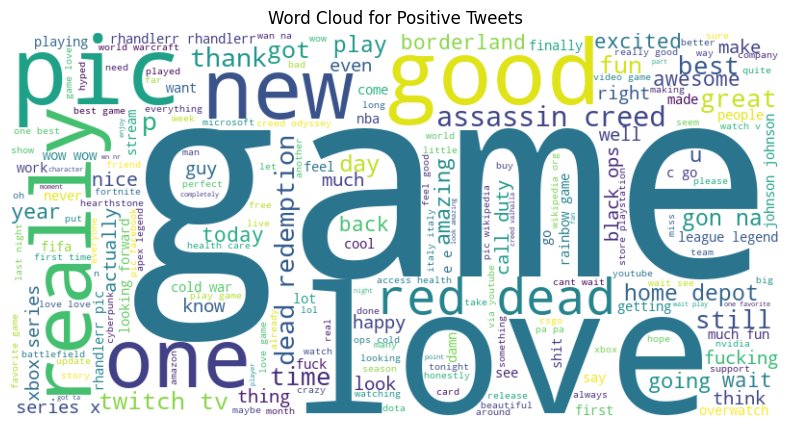

In [13]:
# Filter the DataFrame to get only positive tweets
positive_tweets_df = df_train[df_train['Sentiment'] == 'Positive']

# Concatenate the positive tweet text
positive_tweets_text = ' '.join(positive_tweets_df['Processed_Tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()

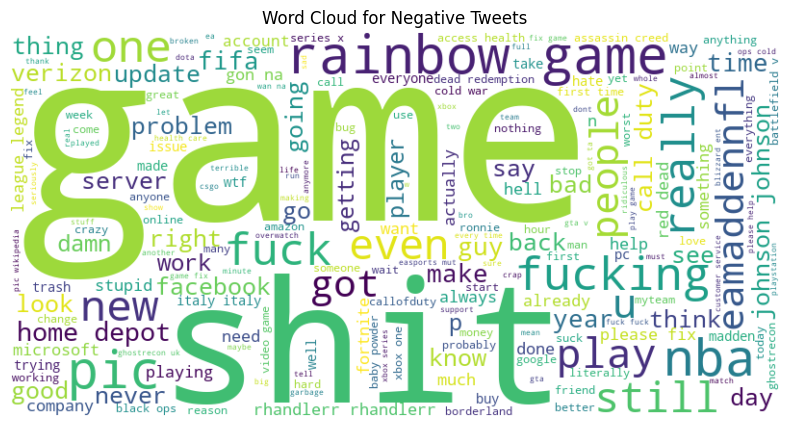

In [14]:
# Filter the DataFrame to get only positive tweets
negative_tweets_df = df_train[df_train['Sentiment'] == 'Negative']

# Concatenate the positive tweet text
negative_tweets_text = ' '.join(negative_tweets_df['Processed_Tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets')
plt.axis('off')
plt.show()

# Word Embedding with Word2Vec

In this section, I perform word embedding using Word2Vec on the processed text data:

- **Tokenization:**
  - I tokenize the processed tweet text data from `df_train` to split it into individual words.

- **Word2Vec Model Training:**
  - I train a Word2Vec model on the tokenized text data. The model's parameters include a vector size of 100, a window size of 5, a minimum word count of 1, and the use of the Continuous Bag of Words (CBOW) algorithm (`sg=0`).

- **Word2Vec Vector Generation:**
  - I define a function `get_average_word2vec` to convert text into average Word2Vec vectors:
    - The function takes a list of tokens, the Word2Vec model, an option to generate missing vectors, and a vector dimension (k) as parameters.
    - It calculates the average Word2Vec vector for the input tokens.
    - If `generate_missing` is enabled, it generates random vectors for missing words.
    - The resulting vector is normalized by dividing it by the length of the input token list.
    
- **Application to Data:**
  - I apply the `get_average_word2vec` function to create Word2Vec vectors for each tweet in `df_train`.
  - These Word2Vec vectors represent the semantic meaning of the words in the tweets and are valuable for various natural language processing (NLP) tasks.

This Word2Vec embedding process allows us to represent text data as dense vectors, capturing semantic relationships between words and enabling more advanced text analysis.

In [15]:
# Tokenize the processed text data
tokenized_text = df_train['Processed_Tweet'].apply(word_tokenize)

# Train a Word2Vec model on your tokenized text (adjust parameters as needed)
word2vec_model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, sg=0)

# Function to convert text to the average Word2Vec vectors
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=100):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

# Apply the function to create Word2Vec vectors for each tweet
df_train['Word2Vec'] = tokenized_text.apply(lambda x: get_average_word2vec(x, word2vec_model.wv))

# Encoding Categorical Features

In this section, I encode categorical features, specifically "Entity" and "Sentiment," into numerical values:

- **Label Encoding:**
  - I initialize two `LabelEncoder` instances, one for "Entity" and another for "Sentiment."
  - These encoders will map categorical values to unique numerical labels.

- **Transforming Training Data:**
  - I fit and transform the "Entity" and "Sentiment" columns in the training dataset (`df_train`) using their respective label encoders.
  - This process converts categorical values into numerical representations, making them suitable for machine learning models.

- **Processing Testing Data:**
  - For the testing dataset (`df_test`), I perform the following additional preprocessing steps:
    - I apply text preprocessing to the "Tweet" column using the `preprocess_text` function.
    - I create Word2Vec vectors for the processed text using the Word2Vec model trained earlier.
    - I encode the "Sentiment" column into numerical values using the same label encoder applied to the training data.

These encoding and preprocessing steps prepare the data for machine learning modeling, where numerical features and labels are essential for training and evaluation.

In [16]:
# Initialize the LabelEncoder for "Entity" and "Sentiment"
entity_label_encoder = LabelEncoder()
sentiment_label_encoder = LabelEncoder()

# Fit and transform the categorical features to numerical values
df_train['Entity_Encoded'] = entity_label_encoder.fit_transform(df_train['Entity'])
df_train['Sentiment_Encoded'] = sentiment_label_encoder.fit_transform(df_train['Sentiment'])

In [17]:
df_test['Processed_Tweet'] = df_test['Tweet'].apply(preprocess_text)
df_test['Word2Vec'] = tokenized_text.apply(lambda x: get_average_word2vec(x, word2vec_model.wv))
df_test['Sentiment_Encoded'] = sentiment_label_encoder.fit_transform(df_test['Sentiment'])

# Naive Bayes Classifier

In this section, I perform machine learning modeling for sentiment analysis:

- **Data Splitting:**
  - I split the data into training and testing sets, with text data represented as `X_train` and `X_test` and corresponding sentiment labels as `y_train` and `y_test`.

- **TF-IDF Vectorization:**
  - I initialize a TF-IDF vectorizer, allowing a maximum of 5000 features (adjustable as needed).
  - I fit and transform the training data (`X_train`) to convert text into TF-IDF vectors.
  - I transform the testing data (`X_test`) using the same vectorizer.

- **Naive Bayes Classifier:**
  - I initialize and train a Multinomial Naive Bayes classifier (`naive_bayes_classifier`) using the TF-IDF transformed training data.
  
- **Predictions and Evaluation:**
  - I make predictions (`y_test_pred`) on the testing data using the trained classifier.
  - I evaluate the classifier's performance on the testing data:
    - Testing Accuracy: The accuracy of the classifier's predictions.
    - Testing Classification Report: A detailed report including precision, recall, F1-score, and support for each sentiment category.

These machine learning modeling steps allow us to assess the classifier's performance in predicting sentiment based on the text data.


In [18]:
# Split the data into training and testing sets
X_train = df_train['Processed_Tweet']
y_train = df_train['Sentiment_Encoded']
X_test = df_test['Processed_Tweet']
y_test = df_test['Sentiment_Encoded']

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_test_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluate the classifier on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, target_names=df_train['Sentiment'].unique())

print(f'Testing Accuracy: {test_accuracy}')
print('Testing Classification Report:\n', test_report)

Testing Accuracy: 0.756
Testing Classification Report:
               precision    recall  f1-score   support

    Positive       0.73      0.74      0.74       266
     Neutral       0.77      0.79      0.78       457
    Negative       0.75      0.71      0.73       277

    accuracy                           0.76      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.76      0.76      0.76      1000



# Logistic Regression with Hyperparameter Tuning

In this section, I perform machine learning modeling for sentiment analysis, including hyperparameter tuning:

- **Data Splitting:**
  - I split the data into training and testing sets, with text data represented as `X_train` and `X_test` and corresponding sentiment labels as `y_train` and `y_test`.

- **Pipeline Setup:**
  - I set up a machine learning pipeline that includes:
    - TF-IDF Vectorization (`TfidfVectorizer`) with English stopwords removal.
    - Logistic Regression as the classification algorithm (`LogisticRegression`) with the 'liblinear' solver.

- **Hyperparameter Tuning:**
  - I define a parameter grid (`params`) to search for the best hyperparameters using GridSearchCV.
    - It includes various TF-IDF vectorization configurations (`ngram_range` and `max_df`) and Logistic Regression regularization strengths (`C`).
  - I perform a grid search (`GridSearchCV`) with cross-validation (cv=3) and accuracy as the scoring metric.
  - The best hyperparameters are printed after the grid search.

- **Prediction and Evaluation:**
  - I make predictions (`pred`) on the testing data using the optimized pipeline.
  - I calculate and display the optimized accuracy score on the testing data.

This machine learning modeling process with hyperparameter tuning allows us to find the best configuration for the TF-IDF vectorizer and Logistic Regression classifier to improve sentiment analysis accuracy.

In [19]:
# Split the data into training and testing sets
X_train = df_train['Processed_Tweet']
y_train = df_train['Sentiment_Encoded']
X_test = df_test['Processed_Tweet']
y_test = df_test['Sentiment_Encoded']

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

params = {'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
          'tfidf_vect__max_df': [0.5, 0.75, 1.0],
          'lr_clf__C': [1, 5, 10]}

grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)
print('Optimized Hyperparameters: ', grid_cv_pipe.best_params_)

pred = grid_cv_pipe.predict(X_test)
print('Optimized Accuracy Score: {0: .3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Optimized Hyperparameters:  {'lr_clf__C': 1, 'tfidf_vect__max_df': 0.5, 'tfidf_vect__ngram_range': (1, 3)}
Optimized Accuracy Score:  0.973


# Support Vector Machine (SVM) Classifier

In this section, I employ a Support Vector Machine (SVM) classifier for sentiment analysis and evaluate its performance:

- **Model Training:**
  - I initialize an SVM classifier (`svm_classifier`) with a linear kernel and default hyperparameters.
  - I train the SVM classifier using the TF-IDF transformed training data (`X_train_tfidf`) and the 'Sentiment' labels from the training data (`df_train['Sentiment']`).

- **Predictions and Evaluation:**
  - I make predictions (`y_pred`) on the testing data using the trained SVM classifier.
  - I calculate and display various evaluation metrics:
    - Accuracy: The accuracy of the classifier's predictions on the testing data.
    - F1 Score (Weighted): A weighted average of the F1 score for each sentiment class.
    - Confusion Matrix: A matrix that provides insights into the classifier's performance, showing the number of true positive, true negative, false positive, and false negative predictions.

- **Confusion Matrix Visualization:**
  - I compute the confusion matrix (`cm`) based on the predictions.
  - I define class labels for sentiment categories ('Negative,' 'Neutral,' 'Positive').
  - I create an annotated heatmap to visualize the confusion matrix, providing a clear representation of the classifier's performance.

This analysis assesses the SVM classifier's effectiveness in sentiment analysis and provides insights into its predictions and classification accuracy.

In [20]:
svm_classifier = SVC(kernel='linear', C=1.0)

In [21]:
svm_classifier.fit(X_train_tfidf, df_train['Sentiment'])

SVC(kernel='linear')

In [22]:
y_pred = svm_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(df_test['Sentiment'], y_pred)
f1 = f1_score(df_test['Sentiment'], y_pred, average='weighted')
confusion = confusion_matrix(df_test['Sentiment'], y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.854
F1 Score: 0.8538858814307587


In [23]:
# Compute the confusion matrix
cm = confusion_matrix(df_test['Sentiment'], y_pred)

# Define the class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Create a heatmap
fig = ff.create_annotated_heatmap(z=cm,
                                  x=class_labels,
                                  y=class_labels,
                                  colorscale='Viridis')

# Add labels and title
fig.update_layout(
    title_text='Confusion Matrix Heatmap for SVC',
    xaxis=dict(title='Predicted'),
    yaxis=dict(title='Actual'),
    template='plotly_dark')
fig.update_traces(coloraxis="coloraxis")
fig.show()

![Plot](plots/6.png)

## In Conclusion:

In [24]:
data = {
    'Algorithm': ['Naive Bayes', 'Logistic Regression', 'SVC'],
    'Accuracy': [0.756, 0.973, 0.854]}
table = tabulate(data, headers='keys', tablefmt='grid')
print(table)

+---------------------+------------+
| Algorithm           |   Accuracy |
+=====================+============+
| Naive Bayes         |      0.756 |
+---------------------+------------+
| Logistic Regression |      0.973 |
+---------------------+------------+
| SVC                 |      0.854 |
+---------------------+------------+


In [25]:
colors = ['red', 'green', 'royalblue']
df = pd.DataFrame(data)
fig = px.bar(df, x='Algorithm', y='Accuracy', title='Accuracy Scores of Different Algorithms', color=colors)
fig.update_traces(marker_line_color='black', marker_line_width=1.5)
fig.update_layout(xaxis_title='Algorithm', yaxis_title='Accuracy', showlegend=False)
fig.update_layout(bargap=0.05, template = 'plotly_dark')
fig.show()

![Plot](plots/7.png)

# Entity Classification with Naive Bayes

In this section, I perform entity classification using a Multinomial Naive Bayes classifier:

- **Data Preparation:**
  - I set up the training and testing data for entity classification:
    - `X_train` and `y_train` represent the processed tweet text and corresponding entity labels from the training data.
    - `X_test` and `y_test` represent the processed tweet text and entity labels from the testing data.

- **Model Training:**
  - I initialize and train a Multinomial Naive Bayes classifier (`naive_bayes_classifier`) using the TF-IDF transformed training data (`X_train_tfidf`) and entity labels (`y_train`).

- **Predictions and Evaluation:**
  - I make predictions (`y_test_pred`) on the testing data using the trained classifier.
  - I calculate the testing accuracy (`test_accuracy`) to assess the classifier's performance in entity classification.

- **Classification Report:**
  - I generate a detailed classification report (`classification_rep`) that includes metrics such as precision, recall, F1-score, and support for each entity category.

- **Results Display:**
  - I print the testing accuracy and the classification report to provide insights into the classifier's performance in entity classification.

This analysis focuses on classifying entities based on tweet text using a Naive Bayes classifier and presents evaluation metrics to gauge its accuracy and precision.

In [26]:
X_train = df_train['Processed_Tweet']
y_train = df_train['Entity']
X_test = df_test['Processed_Tweet']
y_test = df_test['Entity']

# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_test_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate a classification report
classification_rep = classification_report(y_test, y_test_pred)

# Print the results
print(f'Testing Accuracy: {test_accuracy}')
print('Classification Report:\n', classification_rep)

Testing Accuracy: 0.886
Classification Report:
                                    precision    recall  f1-score   support

                           Amazon       0.91      0.94      0.93        34
                      ApexLegends       0.83      0.81      0.82        36
                   AssassinsCreed       0.84      0.82      0.83        33
                      Battlefield       0.88      0.85      0.86        26
                      Borderlands       0.91      0.97      0.94        33
                            CS-GO       0.80      0.75      0.77        32
                       CallOfDuty       0.93      0.81      0.86        31
        CallOfDutyBlackopsColdWar       0.75      0.78      0.76        27
                    Cyberpunk2077       0.96      0.77      0.85        30
                            Dota2       0.80      0.74      0.77        27
                             FIFA       1.00      0.92      0.96        38
                         Facebook       0.90      0

In [27]:
# Generate a classification report
class_report = classification_report(y_test, y_test_pred, output_dict=True)

# Extract precision, recall, and F1-score for each category
categories = list(class_report.keys())[:-3]  # Exclude 'micro avg', 'macro avg', and 'weighted avg'
precision = [class_report[cat]['precision'] for cat in categories]
recall = [class_report[cat]['recall'] for cat in categories]
f1_score = [class_report[cat]['f1-score'] for cat in categories]

# Create a bar plot for precision, recall, and F1-score
fig_metrics = go.Figure(data=[
    go.Bar(name='Precision', x=categories, y=precision),
    go.Bar(name='Recall', x=categories, y=recall),
    go.Bar(name='F1-Score', x=categories, y=f1_score)])

fig_metrics.update_layout(
    title='Precision, Recall, and F1-Score by Category',
    xaxis_title='Categories',
    yaxis_title='Score',
    xaxis=dict(type='category'),
    barmode='group', template = 'plotly_dark')
fig_metrics.show()

![Plot](plots/8.png)

# Entity Classification with Logistic Regression (with Hyper Tuning)

In this section, I perform hyperparameter tuning for a Logistic Regression classifier:

- **Classifier Initialization:**
  - I initialize a Logistic Regression classifier (`logistic_regression_classifier`) with a maximum of 1000 iterations.

- **Hyperparameter Grid Search:**
  - I define a grid of hyperparameters (`param_grid`) to search for the best combination.
    - This grid includes the regularization strength (`C`) with values [0.001, 0.01, 0.1, 1, 10] and regularization type (`penalty`) with options ['l1', 'l2'].
  - I set up a GridSearchCV with 5-fold cross-validation (`cv=5`) to find the best hyperparameters that maximize accuracy (`scoring='accuracy'`).

- **Model Training and Selection:**
  - I fit the grid search to the TF-IDF transformed training data (`X_train_tfidf`) and entity labels (`y_train`).
  - I identify the best classifier (`best_classifier`) based on the selected hyperparameters.

- **Predictions and Evaluation:**
  - I make predictions (`y_test_pred`) on the testing data using the best classifier.
  - I calculate the testing accuracy (`test_accuracy`) to assess the classifier's performance.

- **Classification Metrics Visualization:**
  - I generate a classification report and extract precision, recall, and F1-score for each entity category.
  - I create a bar plot to visualize precision, recall, and F1-score for each category, providing a comprehensive overview of the classifier's performance.

This analysis fine-tunes the Logistic Regression classifier's hyperparameters and presents a visual summary of classification metrics for entity classification.


In [28]:
# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(max_iter=1000)

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(logistic_regression_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train)

# Get the best estimator (classifier with best hyperparameters)
best_classifier = grid_search.best_estimator_

In [29]:
# Make predictions on the testing data using the best classifier
y_test_pred = best_classifier.predict(X_test_tfidf)

In [30]:
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate a classification report
classification_rep = classification_report(y_test, y_test_pred, output_dict=True)

# Extract precision, recall, and F1-score for each category
categories = list(classification_rep.keys())[:-3]  # Exclude 'micro avg', 'macro avg', and 'weighted avg'
precision = [classification_rep[cat]['precision'] for cat in categories]
recall = [classification_rep[cat]['recall'] for cat in categories]
f1_score = [classification_rep[cat]['f1-score'] for cat in categories]

# Create a bar plot for precision, recall, and F1-score
fig_metrics = go.Figure(data=[
    go.Bar(name='Precision', x=categories, y=precision),
    go.Bar(name='Recall', x=categories, y=recall),
    go.Bar(name='F1-Score', x=categories, y=f1_score)])

fig_metrics.update_layout(
    title='Precision, Recall, and F1-Score by Category',
    xaxis_title='Categories',
    yaxis_title='Score',
    xaxis=dict(type='category'),
    barmode='group',template = 'plotly_dark')
print(f'Testing Accuracy: {test_accuracy}')
fig_metrics.show()

Testing Accuracy: 0.834


![Plot](plots/9.png)